In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Importing data
df = pd.read_csv("epa-sea-level.csv")
# Choosing a shorter column name
df.rename(columns={"CSIRO Adjusted Sea Level": "Rise"}, inplace = True)

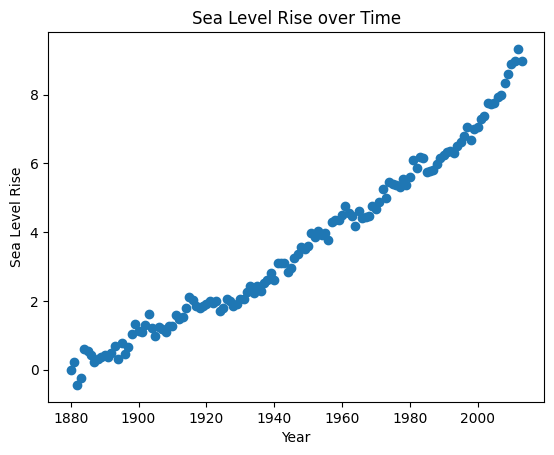

In [96]:
# Plotting sea level rise by year as a scatterplot to get a look at the trend
plt.scatter(df.Year, df.Rise)
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Sea Level Rise over Time");

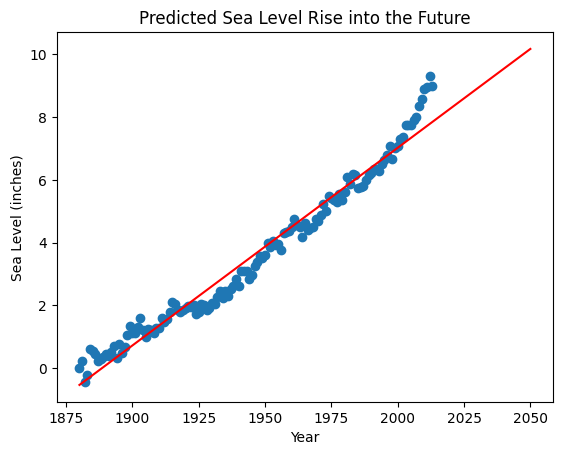

In [99]:
# Next we predict how much the sea level may increase in the future based on the rate of increase we can calculate from the data
# Extracting slope and y intercept from the data through linear regression
slope, intercept, _, _, _ = linregress(df.Year, df.Rise)
# The line of best fit can be calculated with the equation y = mx + b, where b is the y-intercept and m is the slope
# We can use the slope and intercept we extracted to calculate a y value for each value of x, allowing us to predict increase into the future
years = np.arange(1880, 2051)
plt.scatter(df.Year, df.Rise)
plt.plot(years, (slope*years+intercept), c = "r")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Predicted Sea Level Rise into the Future");

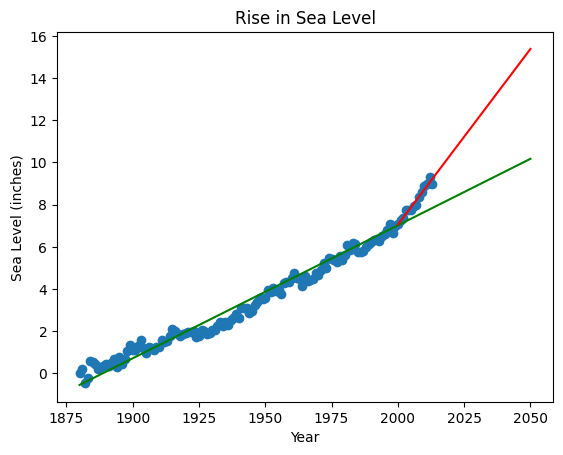

In [100]:
# Sea level increase appears to spike around the year 2000, so we calculate a new line of best fit based on only that data to make predictions based on the new rate
# Calculate a new slope and intercept using only the data from the year 2000 onwards
df2 = df[df.Year >= 2000]
slope2, intercept2, _, _, _ =linregress(df2.Year, df2.Rise)
plt.scatter(df.Year, df.Rise)
plt.plot(years, (slope*years+intercept), c = "g")
years2 = np.arange(2000, 2051)
plt.plot(years2, (slope2*years2+intercept2), c = "r")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level");

In [118]:
# Packaging all code into a single function for use with freeCodeCamp tests
def draw_plot():
    # Creating data frame
    df = pd.read_csv("epa-sea-level.csv")
    df.rename(columns={"CSIRO Adjusted Sea Level": "Rise"}, inplace = True)

    # Creating variables for line of best fit based on all data
    slope, intercept, _, _, _ = linregress(df.Year, df.Rise)
    years = np.arange(1880, 2051)
    
    # Creating variables for line of best fit based on only post-2000 data
    df2 = df[df.Year >= 2000]
    slope2, intercept2, _, _, _ =linregress(df2.Year, df2.Rise)
    years2 = np.arange(2000, 2051)

    # Plotting lines of best fit superimposed atop scatterplot of the actual data
    plt.scatter(df.Year, df.Rise)
    plt.plot(years, (slope*years+intercept), c = "g")
    plt.plot(years2, (slope2*years2+intercept2), c = "r")

    # Creating plot labels
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")
    plt.title("Rise in Sea Level")

    plt.savefig('sea_level_plot.png')
    return plt.gca()

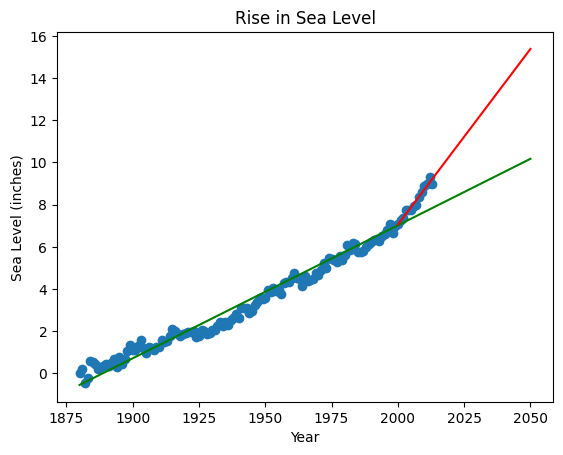

In [120]:
draw_plot();